# Data Import

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\my pc\Desktop\i neuron\petrol-price-forecasting\train_data.csv")

In [4]:
df

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
...,...,...
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [6]:
df.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [7]:
df =df.dropna()

In [8]:
df.columns


Index(['Date', 'Petrol (USD)'], dtype='object')

In [9]:
df1=df.reset_index()['Petrol (USD)']

In [10]:
df1.shape

(811,)

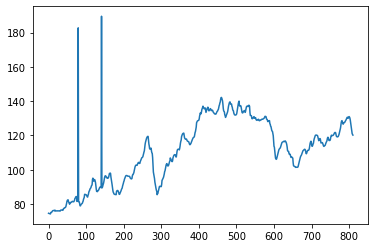

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[3.29575022e-03]
 [2.25498699e-03]
 [1.82133565e-03]
 [1.21422376e-03]
 [6.07111882e-04]
 [0.00000000e+00]
 [7.45880312e-03]
 [7.71899393e-03]
 [7.89245447e-03]
 [1.06678231e-02]
 [1.38768430e-02]
 [1.59583695e-02]
 [1.66522116e-02]
 [1.75195143e-02]
 [1.72593235e-02]
 [1.68256722e-02]
 [1.62185603e-02]
 [1.92541197e-02]
 [1.46574154e-02]
 [1.59583695e-02]
 [1.55247181e-02]
 [1.55247181e-02]
 [1.50043365e-02]
 [1.49176062e-02]
 [1.56981787e-02]
 [1.55247181e-02]
 [1.52645273e-02]
 [1.51777971e-02]
 [1.48308760e-02]
 [1.50043365e-02]
 [1.44839549e-02]
 [1.46574154e-02]
 [1.86470078e-02]
 [1.93408500e-02]
 [1.96877710e-02]
 [1.98612316e-02]
 [1.93408500e-02]
 [1.88204683e-02]
 [1.83000867e-02]
 [2.18560278e-02]
 [2.75802255e-02]
 [2.80138768e-02]
 [2.93148309e-02]
 [3.16565481e-02]
 [3.18300087e-02]
 [3.32176930e-02]
 [3.63399827e-02]
 [4.39722463e-02]
 [5.28187337e-02]
 [6.31396357e-02]
 [6.86903729e-02]
 [7.05984389e-02]
 [7.13790113e-02]
 [6.35732871e-02]
 [5.92367736e-02]
 [5.377276

In [16]:
##splitting dataset into train and test split

In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [18]:
train_data

array([[3.29575022e-03],
       [2.25498699e-03],
       [1.82133565e-03],
       [1.21422376e-03],
       [6.07111882e-04],
       [0.00000000e+00],
       [7.45880312e-03],
       [7.71899393e-03],
       [7.89245447e-03],
       [1.06678231e-02],
       [1.38768430e-02],
       [1.59583695e-02],
       [1.66522116e-02],
       [1.75195143e-02],
       [1.72593235e-02],
       [1.68256722e-02],
       [1.62185603e-02],
       [1.92541197e-02],
       [1.46574154e-02],
       [1.59583695e-02],
       [1.55247181e-02],
       [1.55247181e-02],
       [1.50043365e-02],
       [1.49176062e-02],
       [1.56981787e-02],
       [1.55247181e-02],
       [1.52645273e-02],
       [1.51777971e-02],
       [1.48308760e-02],
       [1.50043365e-02],
       [1.44839549e-02],
       [1.46574154e-02],
       [1.86470078e-02],
       [1.93408500e-02],
       [1.96877710e-02],
       [1.98612316e-02],
       [1.93408500e-02],
       [1.88204683e-02],
       [1.83000867e-02],
       [2.18560278e-02],


In [19]:
test_data

array([[0.54345186],
       [0.54475282],
       [0.54570685],
       [0.54457936],
       [0.54310494],
       [0.54579358],
       [0.54978317],
       [0.54865568],
       [0.54414571],
       [0.51335646],
       [0.49791847],
       [0.49835212],
       [0.4971379 ],
       [0.49618387],
       [0.48317433],
       [0.48135299],
       [0.48291414],
       [0.48412836],
       [0.48603643],
       [0.49045967],
       [0.49219428],
       [0.48430182],
       [0.48412836],
       [0.48612316],
       [0.48699046],
       [0.47840416],
       [0.4753686 ],
       [0.47389419],
       [0.47354727],
       [0.47658283],
       [0.47692975],
       [0.47831743],
       [0.47857762],
       [0.47311362],
       [0.47146574],
       [0.47311362],
       [0.47267997],
       [0.47424111],
       [0.47614918],
       [0.47597572],
       [0.47753686],
       [0.47953166],
       [0.47883781],
       [0.47961839],
       [0.48065915],
       [0.48117953],
       [0.48282741],
       [0.485

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----199   200 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
X_train

array([[0.00329575, 0.00225499, 0.00182134, ..., 0.14102342, 0.14718127,
        0.15420642],
       [0.00225499, 0.00182134, 0.00121422, ..., 0.14718127, 0.15420642,
        0.16235906],
       [0.00182134, 0.00121422, 0.00060711, ..., 0.15420642, 0.16235906,
        0.16686904],
       ...,
       [0.26799653, 0.2830876 , 0.27944493, ..., 0.52116219, 0.52254987,
        0.52307025],
       [0.2830876 , 0.27944493, 0.2753686 , ..., 0.52254987, 0.52307025,
        0.51370338],
       [0.27944493, 0.2753686 , 0.27085863, ..., 0.52307025, 0.51370338,
        0.51656548]])

In [26]:
print(X_train.shape), print(y_train.shape)

(326, 200)
(326,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(83, 200)
(83,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
X_train

array([[[0.00329575],
        [0.00225499],
        [0.00182134],
        ...,
        [0.14102342],
        [0.14718127],
        [0.15420642]],

       [[0.00225499],
        [0.00182134],
        [0.00121422],
        ...,
        [0.14718127],
        [0.15420642],
        [0.16235906]],

       [[0.00182134],
        [0.00121422],
        [0.00060711],
        ...,
        [0.15420642],
        [0.16235906],
        [0.16686904]],

       ...,

       [[0.26799653],
        [0.2830876 ],
        [0.27944493],
        ...,
        [0.52116219],
        [0.52254987],
        [0.52307025]],

       [[0.2830876 ],
        [0.27944493],
        [0.2753686 ],
        ...,
        [0.52254987],
        [0.52307025],
        [0.51370338]],

       [[0.27944493],
        [0.2753686 ],
        [0.27085863],
        ...,
        [0.52307025],
        [0.51370338],
        [0.51656548]]])

In [48]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(200,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 200, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 200, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 15s 1s/step - loss: 0.0557 - val_loss: 0.0265
Epoch 2/100
6/6 [==============================] - 4s 595ms/step - loss: 0.0115 - val_loss: 0.0115
Epoch 3/100
6/6 [==============================] - 4s 601ms/step - loss: 0.0106 - val_loss: 9.4459e-04
Epoch 4/100
6/6 [==============================] - 4s 596ms/step - loss: 0.0054 - val_loss: 0.0038
Epoch 5/100
6/6 [==============================] - 4s 595ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 6/100
6/6 [==============================] - 4s 596ms/step - loss: 0.0041 - val_loss: 8.9068e-04
Epoch 7/100
6/6 [==============================] - 4s 597ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 8/100
6/6 [==============================] - 4s 600ms/step - loss: 0.0029 - val_loss: 9.1034e-04
Epoch 9/100
6/6 [==============================] - 4s 599ms/step - loss: 0.0025 - val_loss: 8.6143e-04
Epoch 10/100
6/6 [==============================] - 4s 598ms/step - loss: 0.0024 - val_loss: 7.

6/6 [==============================] - 3s 585ms/step - loss: 5.9396e-04 - val_loss: 4.2388e-04
Epoch 80/100
6/6 [==============================] - 4s 593ms/step - loss: 5.4062e-04 - val_loss: 3.7025e-04
Epoch 81/100
6/6 [==============================] - 4s 590ms/step - loss: 4.8387e-04 - val_loss: 7.0965e-04
Epoch 82/100
6/6 [==============================] - 3s 572ms/step - loss: 6.3103e-04 - val_loss: 3.7538e-04
Epoch 83/100
6/6 [==============================] - 4s 589ms/step - loss: 5.5720e-04 - val_loss: 3.6154e-04
Epoch 84/100
6/6 [==============================] - 4s 612ms/step - loss: 4.5787e-04 - val_loss: 4.9807e-04
Epoch 85/100
6/6 [==============================] - 4s 588ms/step - loss: 5.5104e-04 - val_loss: 4.6331e-04
Epoch 86/100
6/6 [==============================] - 3s 574ms/step - loss: 4.6039e-04 - val_loss: 3.5085e-04
Epoch 87/100
6/6 [==============================] - 3s 589ms/step - loss: 4.2648e-04 - val_loss: 4.3000e-04
Epoch 88/100
6/6 [=======================

In [52]:
model.save('keras_model.h1')

INFO:tensorflow:Assets written to: keras_model.h1\assets


INFO:tensorflow:Assets written to: keras_model.h1\assets


In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [54]:
train_predict

array([[0.14694646],
       [0.15548366],
       [0.16436216],
       [0.17333516],
       [0.1820747 ],
       [0.19029179],
       [0.1976661 ],
       [0.20390809],
       [0.20869903],
       [0.21176973],
       [0.21306501],
       [0.21264113],
       [0.2107292 ],
       [0.20780332],
       [0.20441024],
       [0.20101653],
       [0.19795892],
       [0.19537655],
       [0.19292934],
       [0.19044223],
       [0.18791565],
       [0.18544865],
       [0.18328434],
       [0.18180403],
       [0.18210942],
       [0.18473531],
       [0.18930395],
       [0.1954199 ],
       [0.20252131],
       [0.210475  ],
       [0.21945983],
       [0.22920221],
       [0.23920116],
       [0.24877027],
       [0.25703833],
       [0.2632122 ],
       [0.2668466 ],
       [0.26806208],
       [0.2677784 ],
       [0.2669014 ],
       [0.26615387],
       [0.2657207 ],
       [0.26540634],
       [0.26480168],
       [0.26385966],
       [0.2634089 ],
       [0.26407552],
       [0.266

In [58]:
test_predict


array([[116.61262 ],
       [116.46827 ],
       [116.34153 ],
       [116.254425],
       [116.16337 ],
       [116.00295 ],
       [115.72197 ],
       [115.35143 ],
       [114.99374 ],
       [114.72345 ],
       [114.58879 ],
       [114.651024],
       [114.954285],
       [115.48004 ],
       [116.15882 ],
       [116.92592 ],
       [117.7903  ],
       [118.717445],
       [119.58705 ],
       [120.20244 ],
       [120.390854],
       [120.160805],
       [119.63148 ],
       [118.95535 ],
       [118.32506 ],
       [117.98115 ],
       [118.02909 ],
       [118.44509 ],
       [119.047516],
       [119.69609 ],
       [120.279976],
       [120.727066],
       [121.02727 ],
       [121.21998 ],
       [121.37096 ],
       [121.55119 ],
       [121.772224],
       [122.00513 ],
       [122.193474],
       [122.189926],
       [121.89286 ],
       [121.34937 ],
       [120.67005 ],
       [119.99801 ],
       [119.44896 ],
       [119.10611 ],
       [119.039116],
       [119.2

In [67]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.01855687488339767

In [68]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.017498357578018677

In [69]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

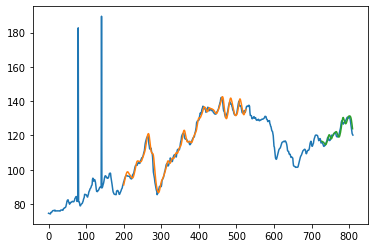

In [71]:
### Plotting 
# shift train predictions for plotting
look_back=200
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
len(test_data)

284

In [73]:
x_input=test_data[84:].reshape(1,-1)
x_input.shape

(1, 200)

In [74]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [75]:
temp_input

[0.31101474414570685,
 0.3194275802254988,
 0.3247181266261926,
 0.32827406764960976,
 0.3309627059843886,
 0.3322636600173461,
 0.33529921942758034,
 0.3411968777103209,
 0.3474414570685169,
 0.3546400693842151,
 0.3601908065915004,
 0.3626192541196879,
 0.36357328707719005,
 0.36470078057241995,
 0.3658282740676496,
 0.3676496097137901,
 0.3672159583694711,
 0.36539462272333056,
 0.3660017346053773,
 0.36929748482220315,
 0.3662619254119689,
 0.3634865568083262,
 0.3579358196010408,
 0.35013009540329576,
 0.33842150910667834,
 0.32090199479618386,
 0.31821335646140514,
 0.31561144839549005,
 0.3156981786643539,
 0.3058109280138769,
 0.3012142237640937,
 0.30147441457068525,
 0.30182133564614055,
 0.29340849956634873,
 0.28620988725065044,
 0.2856027753686037,
 0.28751084128360804,
 0.2869037294015613,
 0.2841283607979185,
 0.2822202948829142,
 0.25836947094536,
 0.24388551604509978,
 0.24197745013009542,
 0.24102341717259335,
 0.24006938421509116,
 0.23928881179531658,
 0.23599306157

In [76]:
# demonstrate prediction for next 10 weeks
from numpy import array

lst_output=[]
n_steps=200
i=0
while(i<30):
    
    if(len(temp_input)>200):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} week input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} week output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.4024975]
201
1 week input [0.31942758 0.32471813 0.32827407 0.33096271 0.33226366 0.33529922
 0.34119688 0.34744146 0.35464007 0.36019081 0.36261925 0.36357329
 0.36470078 0.36582827 0.36764961 0.36721596 0.36539462 0.36600173
 0.36929748 0.36626193 0.36348656 0.35793582 0.3501301  0.33842151
 0.32090199 0.31821336 0.31561145 0.31569818 0.30581093 0.30121422
 0.30147441 0.30182134 0.2934085  0.28620989 0.28560278 0.28751084
 0.28690373 0.28412836 0.28222029 0.25836947 0.24388552 0.24197745
 0.24102342 0.24006938 0.23928881 0.23599306 0.23547268 0.23677363
 0.23625325 0.23573287 0.23599306 0.23633998 0.23850824 0.24605377
 0.25316565 0.26279271 0.27042498 0.27927147 0.28560278 0.29150043
 0.29470945 0.29765828 0.30277537 0.3085863  0.31387684 0.31934085
 0.32098873 0.32289679 0.32471813 0.32679965 0.32705984 0.32506505
 0.31951431 0.30823938 0.30416305 0.30719861 0.31413703 0.31882047
 0.3217693  0.32159584 0.32220295 0.32471813 0.33078925 0.34267129
 0.35550737 0.36261925 0.36730269

6 week output [[0.39199558]]
7 week input [0.34119688 0.34744146 0.35464007 0.36019081 0.36261925 0.36357329
 0.36470078 0.36582827 0.36764961 0.36721596 0.36539462 0.36600173
 0.36929748 0.36626193 0.36348656 0.35793582 0.3501301  0.33842151
 0.32090199 0.31821336 0.31561145 0.31569818 0.30581093 0.30121422
 0.30147441 0.30182134 0.2934085  0.28620989 0.28560278 0.28751084
 0.28690373 0.28412836 0.28222029 0.25836947 0.24388552 0.24197745
 0.24102342 0.24006938 0.23928881 0.23599306 0.23547268 0.23677363
 0.23625325 0.23573287 0.23599306 0.23633998 0.23850824 0.24605377
 0.25316565 0.26279271 0.27042498 0.27927147 0.28560278 0.29150043
 0.29470945 0.29765828 0.30277537 0.3085863  0.31387684 0.31934085
 0.32098873 0.32289679 0.32471813 0.32679965 0.32705984 0.32506505
 0.31951431 0.30823938 0.30416305 0.30719861 0.31413703 0.31882047
 0.3217693  0.32159584 0.32220295 0.32471813 0.33078925 0.34267129
 0.35550737 0.36261925 0.36730269 0.36678231 0.35125759 0.34267129
 0.34215091 0.347094

12 week output [[0.42653856]]
13 week input [0.36470078 0.36582827 0.36764961 0.36721596 0.36539462 0.36600173
 0.36929748 0.36626193 0.36348656 0.35793582 0.3501301  0.33842151
 0.32090199 0.31821336 0.31561145 0.31569818 0.30581093 0.30121422
 0.30147441 0.30182134 0.2934085  0.28620989 0.28560278 0.28751084
 0.28690373 0.28412836 0.28222029 0.25836947 0.24388552 0.24197745
 0.24102342 0.24006938 0.23928881 0.23599306 0.23547268 0.23677363
 0.23625325 0.23573287 0.23599306 0.23633998 0.23850824 0.24605377
 0.25316565 0.26279271 0.27042498 0.27927147 0.28560278 0.29150043
 0.29470945 0.29765828 0.30277537 0.3085863  0.31387684 0.31934085
 0.32098873 0.32289679 0.32471813 0.32679965 0.32705984 0.32506505
 0.31951431 0.30823938 0.30416305 0.30719861 0.31413703 0.31882047
 0.3217693  0.32159584 0.32220295 0.32471813 0.33078925 0.34267129
 0.35550737 0.36261925 0.36730269 0.36678231 0.35125759 0.34267129
 0.34215091 0.34709454 0.35377277 0.35767563 0.37111882 0.37961839
 0.38525585 0.3921

18 week output [[0.46677157]]
19 week input [0.36929748 0.36626193 0.36348656 0.35793582 0.3501301  0.33842151
 0.32090199 0.31821336 0.31561145 0.31569818 0.30581093 0.30121422
 0.30147441 0.30182134 0.2934085  0.28620989 0.28560278 0.28751084
 0.28690373 0.28412836 0.28222029 0.25836947 0.24388552 0.24197745
 0.24102342 0.24006938 0.23928881 0.23599306 0.23547268 0.23677363
 0.23625325 0.23573287 0.23599306 0.23633998 0.23850824 0.24605377
 0.25316565 0.26279271 0.27042498 0.27927147 0.28560278 0.29150043
 0.29470945 0.29765828 0.30277537 0.3085863  0.31387684 0.31934085
 0.32098873 0.32289679 0.32471813 0.32679965 0.32705984 0.32506505
 0.31951431 0.30823938 0.30416305 0.30719861 0.31413703 0.31882047
 0.3217693  0.32159584 0.32220295 0.32471813 0.33078925 0.34267129
 0.35550737 0.36261925 0.36730269 0.36678231 0.35125759 0.34267129
 0.34215091 0.34709454 0.35377277 0.35767563 0.37111882 0.37961839
 0.38525585 0.39219428 0.39722463 0.39869905 0.39843886 0.39887251
 0.39817866 0.3973

24 week output [[0.48720488]]
25 week input [0.32090199 0.31821336 0.31561145 0.31569818 0.30581093 0.30121422
 0.30147441 0.30182134 0.2934085  0.28620989 0.28560278 0.28751084
 0.28690373 0.28412836 0.28222029 0.25836947 0.24388552 0.24197745
 0.24102342 0.24006938 0.23928881 0.23599306 0.23547268 0.23677363
 0.23625325 0.23573287 0.23599306 0.23633998 0.23850824 0.24605377
 0.25316565 0.26279271 0.27042498 0.27927147 0.28560278 0.29150043
 0.29470945 0.29765828 0.30277537 0.3085863  0.31387684 0.31934085
 0.32098873 0.32289679 0.32471813 0.32679965 0.32705984 0.32506505
 0.31951431 0.30823938 0.30416305 0.30719861 0.31413703 0.31882047
 0.3217693  0.32159584 0.32220295 0.32471813 0.33078925 0.34267129
 0.35550737 0.36261925 0.36730269 0.36678231 0.35125759 0.34267129
 0.34215091 0.34709454 0.35377277 0.35767563 0.37111882 0.37961839
 0.38525585 0.39219428 0.39722463 0.39869905 0.39843886 0.39887251
 0.39817866 0.39731136 0.3954033  0.38803122 0.38005204 0.37051171
 0.37129228 0.3758

In [77]:
day_new=np.arange(1,201)
day_pred=np.arange(201,231)

In [78]:
len(df1)

811

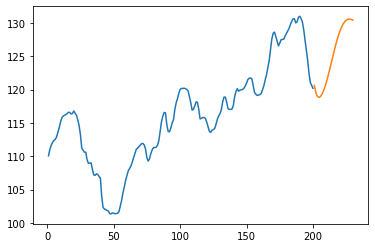

In [79]:
plt.plot(day_new,scaler.inverse_transform(df1[611:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

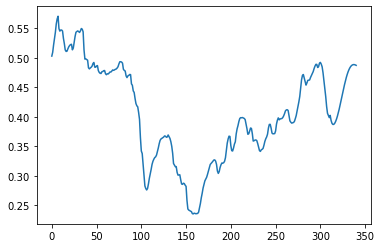

In [80]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[500:])